<a href="https://colab.research.google.com/github/Huynh-Truong-75/AI_day3/blob/main/Nutritial_Needs_Recommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 2.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=5d48e7db01b66f16aebc0b9230ae9bd19597f39097fbe93dbb7ecf998667f345
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [3]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

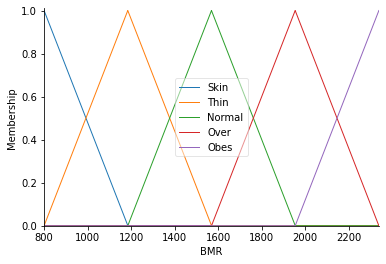

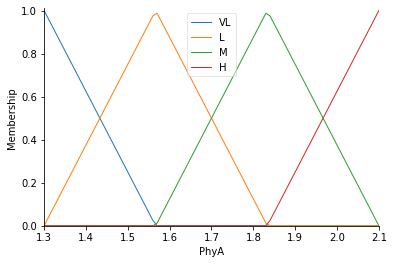

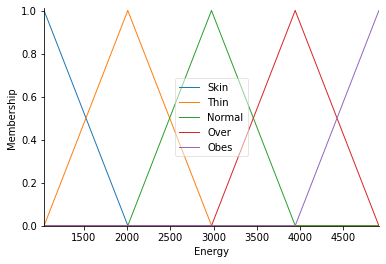

In [6]:
BMR =ctrl.Antecedent(np.arange(799.7,2339.4,0.1),'BMR')
PhyA =ctrl.Antecedent(np.arange(1.3,2.11,0.01),'PhyA')
Energy = ctrl.Consequent(np.arange(1038.7,4912.6,0.1),'Energy')

names_BMR = ['Skin', 'Thin', 'Normal', 'Over','Obes']
names_PhyA = ['VL', 'L', 'M', 'H']
names_Energy = ['Skin', 'Thin', 'Normal', 'Over','Obes']
BMR.automf(names=names_BMR)
PhyA.automf(names=names_PhyA)
Energy.automf(names=names_Energy)

BMR.view()
PhyA.view()
Energy.view()

In [9]:
rule1 =  ctrl.Rule(BMR['Skin']&PhyA['VL'],Energy['Over'])
rule2 =  ctrl.Rule(BMR['Skin']&PhyA['L'],Energy['Obes'])
rule3 =  ctrl.Rule(BMR['Skin']&PhyA['M'],Energy['Obes'])
rule4 =  ctrl.Rule(BMR['Skin']&PhyA['H'],Energy['Obes'])
rule5 =  ctrl.Rule(BMR['Thin']&PhyA['VL'],Energy['Normal'])
rule6 =  ctrl.Rule(BMR['Thin']&PhyA['L'],Energy['Over'])
rule7 =  ctrl.Rule(BMR['Thin']&PhyA['M'],Energy['Obes'])
rule8 =  ctrl.Rule(BMR['Thin']&PhyA['H'],Energy['Obes'])
rule9 =  ctrl.Rule(BMR['Normal']&PhyA['VL'],Energy['Normal'])
rule10 = ctrl.Rule(BMR['Normal']&PhyA['L'],Energy['Normal'])
rule11 = ctrl.Rule(BMR['Normal']&PhyA['M'],Energy['Over'])
rule12 = ctrl.Rule(BMR['Normal']&PhyA['H'],Energy['Obes'])
rule13 = ctrl.Rule(BMR['Over']&PhyA['VL'],Energy['Thin'])
rule14 = ctrl.Rule(BMR['Over']&PhyA['L'],Energy['Normal'])
rule15 = ctrl.Rule(BMR['Over']&PhyA['M'],Energy['Normal'])
rule16 = ctrl.Rule(BMR['Over']&PhyA['H'],Energy['Over'])
rule17 = ctrl.Rule(BMR['Obes']&PhyA['VL'],Energy['Skin'])
rule18 = ctrl.Rule(BMR['Obes']&PhyA['L'],Energy['Thin'])
rule19 = ctrl.Rule(BMR['Obes']&PhyA['M'],Energy['Normal'])
rule20 = ctrl.Rule(BMR['Obes']&PhyA['H'],Energy['Normal'])

3132.461618559475


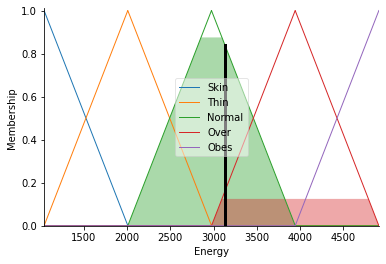

In [12]:
C_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
C= ctrl.ControlSystemSimulation(C_ctrl)
C.input['BMR'] = 1600
C.input['PhyA'] = 1.6
C.compute()
print(C.output['Energy'])
Energy.view(sim=C)